##  Data Exploration and Understanding 🕵🏻‍♀️

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Done!")

Done!


In [166]:
data = pd.read_csv("unicorn_startup_companies.csv" , index_col=False)
data.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [167]:
data.tail()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
1216,1216,LeadSquared,$1,6/21/2022,India,Bengaluru,Enterprise Tech,"Gaja Capital Partners, Stakeboat Capital, West..."
1217,1217,FourKites,$1,6/21/2022,United States,Chicago,Enterprise Tech,"Hyde Park Venture Partners, Bain Capital Ventu..."
1218,1218,VulcanForms,$1,7/5/2022,United States,Burlington,Industrials,"Eclipse Ventures, D1 Capital Partners, Industr..."
1219,1219,SingleStore,$1,7/12/2022,United States,San Francisco,Enterprise Tech,"Google Ventures, Accel, Data Collective"
1220,1220,Unstoppable Domains,$1,7/27/2022,United States,Las Vegas,Media & Entertainment,"Boost VC, Draper Associates, Gaingels"


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1221 non-null   int64 
 1   Company           1221 non-null   object
 2   Valuation ($B)    1221 non-null   object
 3   Date Joined       1221 non-null   object
 4   Country           1221 non-null   object
 5   City              1203 non-null   object
 6   Industry          1221 non-null   object
 7   Select Investors  1219 non-null   object
dtypes: int64(1), object(7)
memory usage: 76.4+ KB


In [169]:
data.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                18
Industry             0
Select Investors     2
dtype: int64

In [170]:
# total unique country and city in the database

print("Unique Countries:")
print(data['Country'].unique())

# Unique cities
print("\nUnique Cities:")
print(data['City'].unique())

Unique Countries:
['China' 'United States' 'Australia' 'United Kingdom' 'Indonesia'
 'Germany' 'India' 'Hong Kong' 'Israel' 'Seychelles' 'Sweden' 'Turkey'
 'Mexico' 'Estonia' 'Canada' 'South Korea' 'Netherlands' 'France'
 'Finland' 'Colombia' 'Belgium' 'Brazil' 'Denmark' 'Switzerland'
 'Lithuania' 'Austria' 'Ireland' 'Singapore' 'Vietnam'
 'United Arab Emirates' 'Argentina' 'Spain' 'Greece' 'Japan' 'Luxembourg'
 'Nigeria' 'Croatia' 'Senegal' 'Malaysia' 'Bermuda' 'Norway'
 'South Africa' 'Ecuador' 'Chile' 'Thailand' 'Czech Republic' 'Egypt'
 'Liechtenstein' 'Italy' 'Philippines' 'London']

Unique Cities:
['Beijing' 'Hawthorne' 'Shenzhen' 'San Francisco' 'Surry Hills' 'London'
 'Cary' 'Jacksonville' 'Shanghai' 'Jakarta' 'Philadelphia' 'New York'
 'Munich' 'Waltham' 'Roseville' 'Changsha' 'Bengaluru' 'Cheung Sha Wan'
 'Tel Aviv' 'Walpole' 'Victoria' 'Glendale' 'Berlin' 'Boston' 'Palo Alto'
 'Stockholm' 'Kirkland' 'Gurugram' 'Istanbul' 'Lerma de Villada'
 'Mountain View' 'Fremont' 'Irvine'

In [171]:
# total unique industry with count
print("Unique Industry with their count")
print(data["Industry"].value_counts())

Unique Industry with their count
Enterprise Tech               370
Financial Services            216
Consumer & Retail             215
Industrials                   190
Healthcare & Life Sciences    122
Media & Entertainment          81
Insurance                      27
Name: Industry, dtype: int64


## Data Processing  

Finiding missing value and handling them

In [172]:
# total null value present in the dataset
print(" Null value present with respective to the columns")
print(data.isnull().sum())

# if null value present then remove that row
print("\n\n After removing null values")
data= data.dropna()
print(data.isnull().sum())

 Null value present with respective to the columns
Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                18
Industry             0
Select Investors     2
dtype: int64


 After removing null values
Unnamed: 0          0
Company             0
Valuation ($B)      0
Date Joined         0
Country             0
City                0
Industry            0
Select Investors    0
dtype: int64


change the column name of "valuation ($B)", "Data Joined" and "Select Investors"

In [173]:
# after remane in columns name
data.rename(columns={'Valuation ($B)' : 'Valuation' , 'Date Joined' : 'DateJoined'},inplace=True)
data.head()

,Unnamed: 0,Company,Valuation,DateJoined,Country,City,Industry,Select Investors
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$137,12/1/2012,United States,Hawthorne,Industrials,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$66,7/3/2018,China,Shenzhen,Consumer & Retail,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$50,1/23/2014,United States,San Francisco,Financial Services,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Enterprise Tech,"Sequoia Capital China, Blackbird Ventures, Mat..."


Remove the $ sign from the valuation column and convert to float

In [174]:
# Remove the dollar sign and convert the 'Valuation' column to a float
data['Valuation'] = data['Valuation'].str.replace('$', '').astype(float)
data.tail()

C:\Users\dell\AppData\Local\Temp\ipykernel_6868\2713547432.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Unnamed: 0,Company,Valuation,DateJoined,Country,City,Industry,Select Investors
1216,1216,LeadSquared,1.0,6/21/2022,India,Bengaluru,Enterprise Tech,"Gaja Capital Partners, Stakeboat Capital, West..."
1217,1217,FourKites,1.0,6/21/2022,United States,Chicago,Enterprise Tech,"Hyde Park Venture Partners, Bain Capital Ventu..."
1218,1218,VulcanForms,1.0,7/5/2022,United States,Burlington,Industrials,"Eclipse Ventures, D1 Capital Partners, Industr..."
1219,1219,SingleStore,1.0,7/12/2022,United States,San Francisco,Enterprise Tech,"Google Ventures, Accel, Data Collective"
1220,1220,Unstoppable Domains,1.0,7/27/2022,United States,Las Vegas,Media & Entertainment,"Boost VC, Draper Associates, Gaingels"


## Feature Engineering

Calculate the average valuation of unicorns per country and city

In [175]:

# Aggregate data by country
country_aggregation = data.groupby('Country').agg(Average_valuation_Per_Country = ('Valuation' , 'mean')).reset_index()
print(country_aggregation.sort_values(by=['Average_valuation_Per_Country'], ascending=False))

                 Country  Average_valuation_Per_Country
38            Seychelles                      10.000000
1              Australia                       6.925000
15               Estonia                       4.950000
45                Turkey                       4.516667
8                  China                       4.108547
20             Hong Kong                       3.837500
2                Austria                       3.805000
22             Indonesia                       3.803750
47        United Kingdom                       3.628269
3                Belgium                       3.360000
12               Denmark                       3.350000
42                Sweden                       3.231429
33           Netherlands                       3.208571
48         United States                       3.131771
16               Finland                       3.115000
28             Lithuania                       3.065000
21                 India                       2

In [176]:
# Aggregate data by city
city_aggregation = data.groupby(['Country', 'City']).agg(
    Average_Valuation_Per_City=('Valuation', 'mean')
).reset_index()

print(city_aggregation)

           Country              City  Average_Valuation_Per_City
0        Argentina      Buenos Aires                       2.450
1        Australia        Alexandria                       1.000
2        Australia          Brisbane                       2.000
3        Australia         Melbourne                       3.400
4        Australia          Richmond                       1.500
..             ...               ...                         ...
287  United States       Westerville                       3.000
288  United States        Wilmington                       1.000
289  United States            Woburn                       1.000
290  United States       Zephyr Cove                       1.500
291        Vietnam  Ho Chi Minh City                       2.635

[292 rows x 3 columns]


In [177]:
# aggregates data by indutry
industry_aggregation = data.groupby(['Industry']).agg(
    Average_Valuation_Per_industry=('Valuation', 'count')
).reset_index()

print(industry_aggregation)

                     Industry  Average_Valuation_Per_industry
0           Consumer & Retail                             211
1             Enterprise Tech                             369
2          Financial Services                             207
3  Healthcare & Life Sciences                             122
4                 Industrials                             186
5                   Insurance                              26
6       Media & Entertainment                              80


extract year from the date and create new column for the same

In [178]:
# separate year from the data set
data['DateJoined'] = pd.to_datetime(data['DateJoined'], format='%m/%d/%Y')
data['Year'] = data['DateJoined'].dt.year
print(data['Year'])

#  unique years with value count
print(data['Year'].value_counts())

0       2017
1       2012
2       2018
3       2014
4       2018
        ... 
1216    2022
1217    2022
1218    2022
1219    2022
1220    2022
Name: Year, Length: 1201, dtype: int64
2021    504
2022    259
2020    103
2019     96
2018     95
2017     41
2015     32
2023     30
2016     20
2014     12
2012      4
2013      3
2011      1
2007      1
Name: Year, dtype: int64


In [179]:
year_aggregation = data.groupby(['Year' , 'Industry']).agg(Industry_per_year=('Industry', 'count')).reset_index()
print(year_aggregation)

    Year                    Industry  Industry_per_year
0   2007           Consumer & Retail                  1
1   2011          Financial Services                  1
2   2012           Consumer & Retail                  2
3   2012          Financial Services                  1
4   2012                 Industrials                  1
..   ...                         ...                ...
68  2023             Enterprise Tech                 11
69  2023          Financial Services                  3
70  2023  Healthcare & Life Sciences                  3
71  2023                 Industrials                  8
72  2023       Media & Entertainment                  3

[73 rows x 3 columns]


## Data Analysis   📊

Visualize the number of unicorns by country using a heatmap or choropleth map

In [180]:
# import plotly.express as px

# # Aggregate data by country for the number of unicorns
# country_counts = data['Country'].value_counts().reset_index()
# country_counts.columns = ['Country', 'Number_of_Unicorns']

# # Plot
# fig = px.choropleth(country_counts, 
#                     locations="Country", 
#                     locationmode='country names',
#                     color="Number_of_Unicorns",
#                     hover_name="Country",
#                     color_continuous_scale=px.colors.sequential.Plasma,
#                     title="Number of Unicorns by Country")
# fig.show()

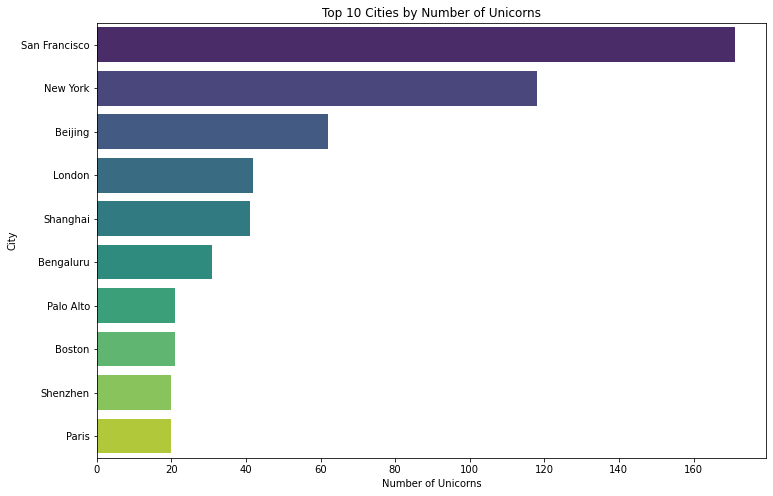

In [181]:
# Aggregate data by city for the number of unicorns
city_counts = data['City'].value_counts().head(10).reset_index()
city_counts.columns = ['City', 'Number_of_Unicorns']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Number_of_Unicorns', y='City', data=city_counts, palette='viridis')
plt.title('Top 10 Cities by Number of Unicorns')
plt.xlabel('Number of Unicorns')
plt.ylabel('City')
plt.show()

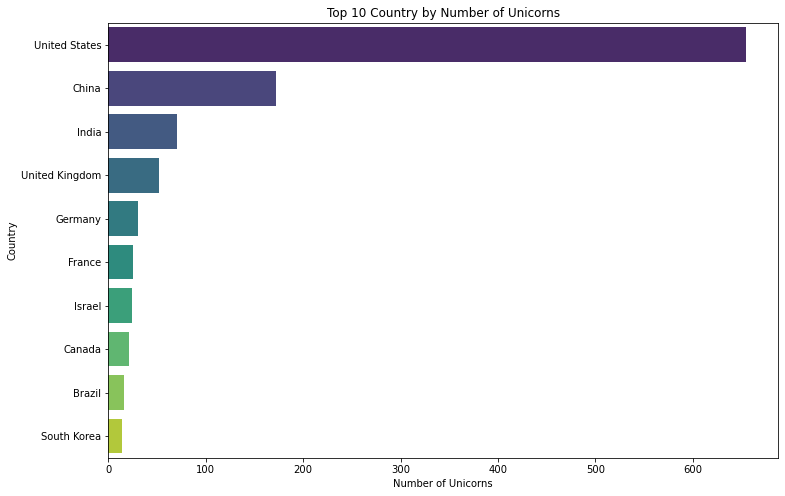

In [182]:
# Aggregate data by city for the number of unicorns
country_counts = data['Country'].value_counts().head(10).reset_index()
country_counts.columns = ['Country', 'Number_of_Unicorns']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Number_of_Unicorns', y='Country', data=country_counts, palette='viridis')
plt.title('Top 10 Country by Number of Unicorns')
plt.xlabel('Number of Unicorns')
plt.ylabel('Country')
plt.show()

    Year  Number_of_Unicorns
0   2021                 504
1   2022                 259
2   2020                 103
3   2019                  96
4   2018                  95
5   2017                  41
6   2015                  32
7   2023                  30
8   2016                  20
9   2014                  12
10  2012                   4
11  2013                   3
12  2011                   1
13  2007                   1


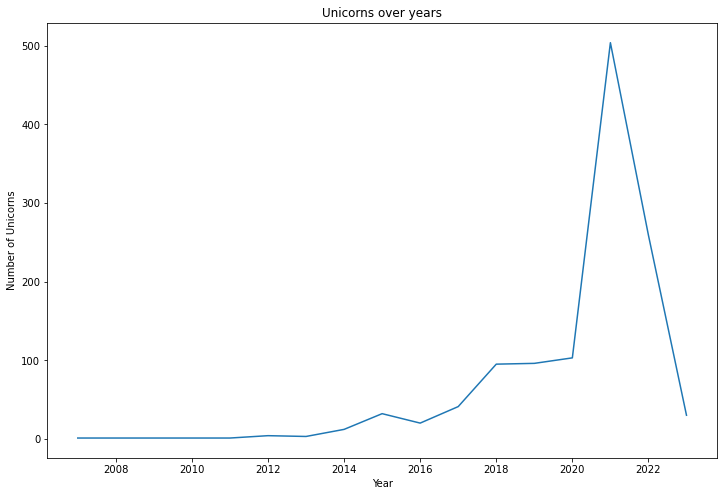

In [183]:
# Aggregate data by city for the number of unicorns
year_counts = data['Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Number_of_Unicorns']

print(year_counts)

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=year_counts, x="Year", y="Number_of_Unicorns" )
plt.title('Unicorns over years')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.show()

                     Industry  Number_of_Unicorns
0             Enterprise Tech                 369
1           Consumer & Retail                 211
2          Financial Services                 207
3                 Industrials                 186
4  Healthcare & Life Sciences                 122
5       Media & Entertainment                  80
6                   Insurance                  26


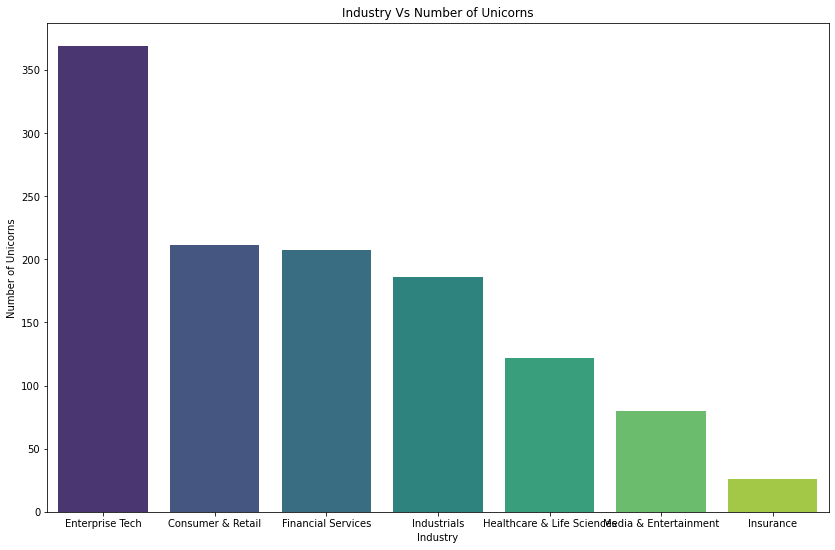

In [184]:
# industry_counts = data.groupby(['Industry']).agg(
#     total_Valuation_Per_industry=('Valuation', 'count')
# ).reset_index()

industry_counts = data['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Number_of_Unicorns']
print(industry_counts)

plt.figure(figsize=(14,9))
sns.barplot(data=industry_counts , y= "Number_of_Unicorns" , x="Industry" , palette='viridis')
plt.title('Industry Vs Number of Unicorns')
plt.xlabel('Industry')
plt.ylabel('Number of Unicorns')
plt.show()

                     Industry  Aggregate_Valuation_Per_industry
0           Consumer & Retail                          2.960900
1             Enterprise Tech                          2.818455
2          Financial Services                          3.342512
3  Healthcare & Life Sciences                          2.306066
4                 Industrials                          3.246505
5                   Insurance                          2.166538
6       Media & Entertainment                          6.212625


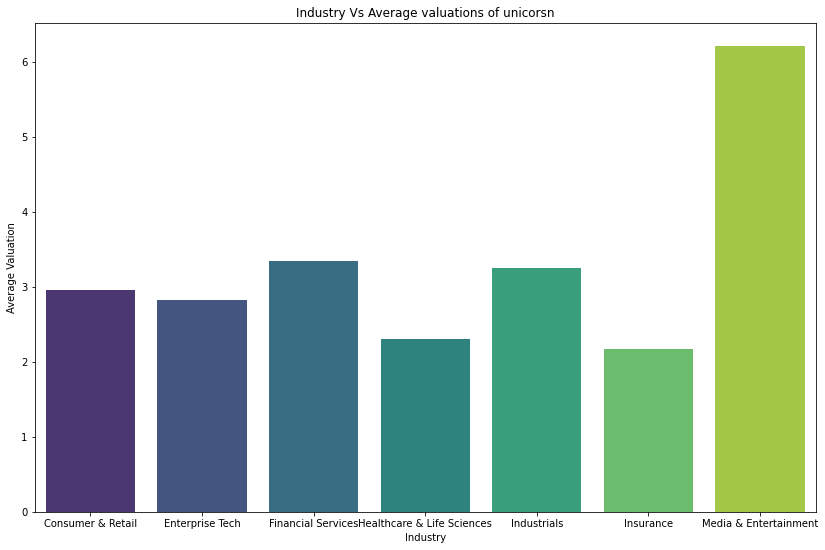

In [185]:
Aggregate_industry_counts = data.groupby(['Industry']).agg(
    Aggregate_Valuation_Per_industry=('Valuation', 'mean')
).reset_index()

print(Aggregate_industry_counts)
plt.figure(figsize=(14,9))
sns.barplot(data=Aggregate_industry_counts , y= "Aggregate_Valuation_Per_industry" , x="Industry" , palette='viridis')
plt.title('Industry Vs Average valuations of unicorsn')
plt.xlabel('Industry')
plt.ylabel('Average Valuation')
plt.show()

                      Industry  Year  Counts
0            Consumer & Retail  2018      21
1            Consumer & Retail  2019      19
2            Consumer & Retail  2020      21
3            Consumer & Retail  2021      69
4            Consumer & Retail  2022      33
5              Enterprise Tech  2018      28
6              Enterprise Tech  2019      23
7              Enterprise Tech  2020      32
8              Enterprise Tech  2021     167
9              Enterprise Tech  2022      91
10          Financial Services  2018      10
11          Financial Services  2019      15
12          Financial Services  2020      13
13          Financial Services  2021     110
14          Financial Services  2022      46
15  Healthcare & Life Sciences  2018       7
16  Healthcare & Life Sciences  2019       6
17  Healthcare & Life Sciences  2020      16
18  Healthcare & Life Sciences  2021      55
19  Healthcare & Life Sciences  2022      27
20                 Industrials  2018      24
21        

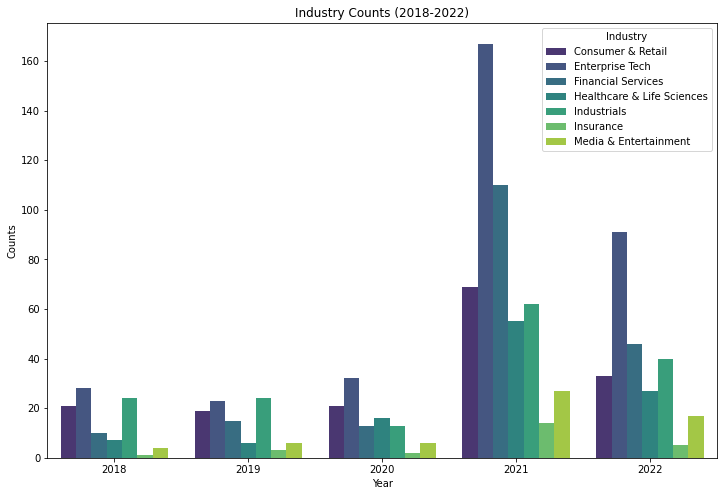

In [186]:

# Create a DataFrame
df = pd.DataFrame(data)

# Filter data for the years 2018 to 2022
filtered_df = df[df['Year'].between(2018, 2022)]

# Group data by Industry and Year, and calculate counts
grouped_df = filtered_df.groupby(['Industry', 'Year']).size().reset_index(name='Counts')
print(grouped_df)

# Create a Seaborn plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Counts', hue='Industry', data=grouped_df ,palette='viridis')
plt.title('Industry Counts (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.legend(title='Industry')
plt.show()
# In this example, replace the data dictionary with your actual data. The code creates a bar plot using Seaborn, where the x-axis represents the years, the y-axis represents the counts of valuations, and each industry is represented by a different color. You can adjust the figure size, title, labels, and other plot s

Indian Market Senario

        City            Industry  Year  Counts
0    Andheri   Consumer & Retail  2022       1
1  Bangalore  Financial Services  2021       1
2  Bengaluru   Consumer & Retail  2017       1
3  Bengaluru   Consumer & Retail  2018       2
4  Bengaluru   Consumer & Retail  2020       1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


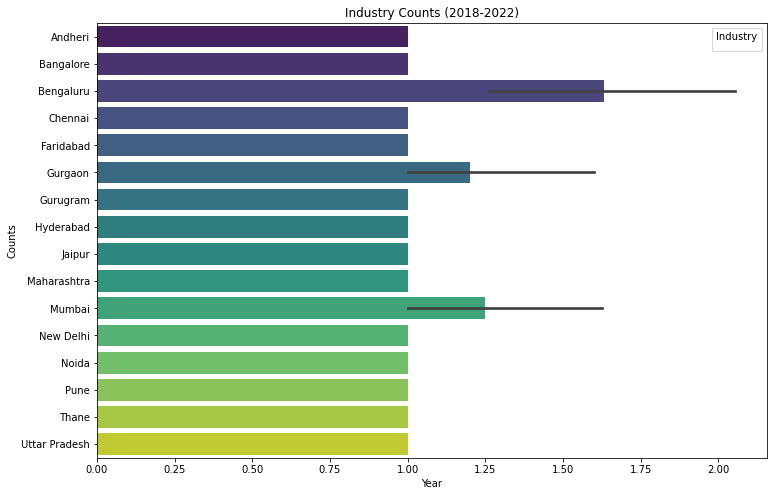

In [198]:

# Create a DataFrame
df = pd.DataFrame(data)

# Filter data for the years 2018 to 2022
filtered_df = df[df['Country']=="India"]

# Group data by Industry and Year, and calculate counts
grouped_df = filtered_df.groupby(['City', 'Industry', 'Year']).size().reset_index(name='Counts')
print(grouped_df.head())

# Create a Seaborn plot
plt.figure(figsize=(12, 8))
sns.barplot(y='City', x='Counts', data=grouped_df ,palette='viridis')
plt.title('India City unicorns counts')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()


In [212]:
plt.figure(figsize=(12, 8))
city_hue = grouped_df['City'].value_counts().head(5)
print(city_hue)

Bengaluru    19
Mumbai        8
Gurgaon       5
Pune          5
Gurugram      4
Name: City, dtype: int64


<Figure size 864x576 with 0 Axes>